<< [第二章：开始之前：神经网络的数学知识](Chapter2-Mathematical-blocks-of-neural-networks.ipynb) || [目录](index.md) || [第四章：机器学习基础](Chapter4-Fundamentals-of-machine-learning.ipynb) >>

# 第三章：进入神经网络

> This chapter is designed to get you started with using neural networks to solve real
problems. You will consolidate the knowledge you gained from our very first practical
example, and you apply what you have learned to three new problems covering the three
most common use cases of neural networks: binary classification, multi-class
classification, and scalar regression.

本章的主要目标是帮助你开始使用神经网络解决实际问题。你可以从中巩固我们前面第一个实际例子中学习到的知识，并且将学习到的内容应用到三个新的问题当中，这些问题涵盖了三个最常用的神经网络的应用场景：二元分类，多类别分类和标量回归。

> In this chapter, you will:

> - Take a closer look at the core components of neural networks we introduced in our first
example: layers, networks, objective functions and optimizers.
- Get a quick introduction to Keras, the Python deep learning library which we will use
throughout the book.
- Set up a workstation for deep learning, with TensorFlow, Theano, Keras, and GPU
support.
- Dive into three introductory examples of how to use neural networks to solve real
problems:
    - classifying movie reviews into positive and negative ones (binary classification).
    - classifying news wires by their topic (multi-class classification).
    - estimating the price of a house given real estate data (regression).

在本章中，你将会：

- 近距离的观察我们在第一个例子中用到的神经网络的核心组件：层、网络、目标函数和优化器。
- 获得Keras的快速入门介绍，它是贯穿本书我们用的的Python深度学习库。
- 搭建一个深度学习工作站，使用TensorFlow、Theano、Keras和GPU支持。
- 深入三个入门级的例子，介绍神经网络如何解决实际问题：
    - 将影评分为正向和负向（二元分类）。
    - 将新闻归类到它们的主题中（多类别分类）。
    - 从给定的房价数据中预测房子的价格（回归）。

> By the end of this chapter, you will already be able to use neural networks to solve
simple machine problems such as classification or regression over vector data. You will
then be ready to start building a more principled and theory-driven understanding of
machine learning, in the next chapter.

学习完本章内容后，你将会具备使用神经网络解决一些简单问题的能力，比方说在矢量数据上进行分类或回归。为下一章开始构建更主要的、更理论化的理解机器学习做好准备。

## 3.1 神经网络剖析

> As we saw in the previous chapters, training a neural network revolves around the
following objects:

> - Layers, which are combined into a network (or model ).
- The input data and corresponding targets .
- The loss function , which defines the feedback signal which is used for learning.
- The optimizer , which determines how the learning proceeds.

上一章我们看到，训练一个神经网络设计下面这些对象：

- 层，多个层可以组成一个网络（或模型）。
- 输入数据和对应的目标值。
- 损失函数，它定义着用来进行学习的反馈信号。
- 优化器，它指导着学习发展的进程。

> You can visualize their interaction in the following way: the network , composed of layers chained together, maps the input data into predictions . The loss function then
compares these predictions to the targets , producing a loss value, a measure how well the
predictions of the network match what was expected. The optimizer uses this loss value
to update the weights of the network.

你可以将上面几个对象之间的相互作用可视化出来：网络，有多个层串联构成，将输入数据映射到预测值。然后损失函数比较这些预测值和目标值，产生一个损失值，这是一个衡量网络预测能力的指标。优化器使用这个损失值来更新网络的权重。

![network layers loss func optimizer](imgs/f3.1.jpg)

图3-1 网络、层、损失函数和优化器之间的联系

> Let’s take a closer look at layers, networks, loss functions and optimizers.

本节我们详细的研究层、网络、损失函数和优化器。

### 3.1.1 层：深度学习的乐高积木

> The fundamental data structure in neural networks is the "layer", to which you have
already been introduced in the previous chapter. A layer is a data-processing module that
takes as input one or more tensors, and outputs one or more tensors. Some layers are
stateless, but more frequently layers have a state: the layer’s "weights", one or several
tensors learned with stochastic gradient descent, and which together contain the
"knowledge" of the network.

神经网络中最基本的数据结构就是“层”，在上一章中我们已经初步接触过它。层是一个数据处理模块，它接受输入一个或多个张量，然后输出一个或多个张量。有些层是无状态的，但更普遍的情况是层具有状态：层的“权重”，它们是一个或数个使用随机梯度下降学习到的张量，其中含有网络的“知识“。

> Different layers are appropriate for different tensor formats and different types of data
processing. For instance, simple vector data, stored in 2D tensors of shape (samples,
features) , is often processed by "fully-connected" layers, also called
"densely-connected" or "dense" layers (the Dense class in Keras). Sequence data, stored
in 3D tensors of shape (samples, timesteps, features) , is typically processed by
"recurrent" layers such as a LSTM layer. Image data, stored in 4D tensors, is usually
processed by 2D convolution layers ( Conv2D ).

不同的层适合不同的张量格式和不同类型的数据处理。例如简单的矢量数据，存储在形状为(样本, 特征)的2D张量当中，通常用“全连接”层进行处理，也被成为“紧密连接”或“紧密”层（在Keras中是Dense类）。序列数据，存储在形状为(样本, 序列号, 特征)的3D张量中，通常使用“循环”层如LSTM层进行处理。图像数据，存储在4D张量中，通常使用2D卷积层（Conv2D）进行处理。

> You can think of layers as the Lego bricks of deep learning, a metaphor which is
made explicit by frameworks like Keras. Building deep learning models in Keras is done
by clipping together compatible layers to form useful data transformation pipelines. The
notion of "layer compatibility" here refers specifically to the fact that every layer will
only accept input tensors of a certain shape, and will return output tensors of a certain
shape. Consider the following example:

你可以将层想象成深度学习的乐高积木，这是一个比喻，但是它被类似Keras这样的框架具体化了。在Keras中构建深度学习模型就是通过将兼容的层次堆叠在一起形成有用的数据转换管道完成的。这里的“层兼容性”具体表示的就是每个层只能接受某种特定形状的输入张量，并且输出某种特定形状的张量。考虑下面的例子：

In [1]:
from tensorflow.keras import layers

# 一个带有32个输入单元的全连接层
layer = layers.Dense(32, input_shape=(784,))

> We are creating a layer that will only accept as input 2D tensors where the first
dimension is 784 (the zero-th dimension, the batch dimension, is unspecified and thus
any value would be accepted). And this layer will return a tensor where the first
dimension has been transformed to be 32 :

我们上面创建了一个仅接受2D张量输入的层，输入的张量的第一个维度是784（第一个轴本来应该是批次轴，在这里没有设置，因此能够接受任何值）。这个层会输出一个张量，其第一个维度会被转换为32：

In [2]:
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(layer)
layer.output_shape

(None, 32)

> Thus this layer can only be connected to an upstream that expects 32-dimensional
vectors as its input. When using Keras you don’t have to worry about compatibility,
because the layers that you add to your models are dynamically built to match the shape
of the incoming layer. For instance, if you write the following:

因此这个层只能够被连接到接受一个32维矢量作为输入的层的上游。当使用Keras时，你不需要担心兼容性问题，因为加入网络的层会自动匹配上游输出的形状然后进行动态构建，例如下面的代码：

In [3]:
model = Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

> The second layer did not receive an input shape argument—instead it automatically
inferred its input shape as being the output shape of the layer that came before.

第二层没有指定输入张量形状参数 - 它依据上面层次的输出形状自动推断出了输入的形状。

### 3.1.2 模型：层的网络结构

> A deep learning model is simply a directed acyclic graph of layers. The most common
instance would be a linear stack of layers, mapping a single input to a single output.

一个深度学习模型简单来说就是一个有向无环的层网络。其中最常见的就是一个线性堆叠的层栈，将一个输入映射成一个输出。

> However, as you move forward, you will be exposed to a much broader variety of
network topologies. Some common ones include:

> - Two-branch networks
- Multi-head networks
- Inception blocks

然而随着你慢慢深入，你也会碰到一些更加复杂的网络拓扑。其中常见的包括：

- 双分支网络
- 多头网络
- 认知结构块

> The topology of a network defines an hypothesis space . You may remember that in
chapter one, we defined machine learning as "searching for useful representations of
some input data, within a pre-defined space of possibilities, using guidance from some
feedback signal". By choosing a network topology, you have constrained your "space of
possibilities" (hypothesis space) to a specific series of tensor operations, mapping input data to output data. What you will then be "searching" for, is a good set of values for the
weight tensors involved in these tensor operations.

网络的拓扑定义了一个假设空间。你应该还记得我们在第一章中把机器学习定义为“对一些预设概率空间的输入数据，通过反馈信号指引，寻找有用的表现形式”。在选择网络拓扑时，你就已经限制了你的“概率空间”（假设空间），使得它只能应用特定的一些张量操作，将输入数据映射到输出数据。然后你将“找到”的是涉及假设空间和这些张量操作的一组较理想的值作为权重张量。

> Picking the right network architecture is more an art than a science, and while there
are some best practices and principles you can rely on, only practice can really help you
become a proper neural network architect. The next few chapters will both teach you
explicit principles for building neural networks, and will help you develop intuition as to
what works or doesn’t work for specific problems.

选择正确的网络结构更像是一门艺术而不是科学，而且虽然有一些最佳实践和原则你可以依赖，但是只有时间才能真正帮助你成为一个合格的神经网络架构师。下面一些章节既会指导你关于构建神经网络的明确原则，也会帮助你建立对于特定问题选择较好方案的直觉。

### 3.1.3 损失函数和优化器：控制学习过程的关键

> Once the network architecture is defined, we still have to pick two more things:

> - The loss function (or objective function), the quantity that will be minimized during
training. It represents a measure of success on the task at hand.
- The optimizer, which determines how the network will be updated based on the loss
function. It implements a specific variant of stochastic gradient descent.

当网络结构定义好了之后，我们还需要再选择两样东西：

- 损失函数（或者叫目标函数），这是一个会在学习过程中试图最小化的数值。它代表着当前手头任务的成功度量。
- 优化器，它决定网络会如何依据损失函数更新它的参数。一般采用随机梯度下降的一个特定变种实现。

> A neural network that has multiple outputs may have multiple loss functions (one per
output), however the gradient descent process must be based on a single scalar loss value,
so what happens for multi-loss networks is that all losses are combined (via averaging)
into a single scalar quantity.

一个有着多个输出的神经网络也可以有着多个损失函数（每个输出对应一个），然而梯度下降过程必须基于一个单独的标量损失值，因此具有多个损失函数的网络会将全部的损失组合（通过平均）成一个单独的标量值。

> Picking the right objective function for the right problem is extremely important: your
network will take any shortcut it can to minimize it, so if the objective doesn’t fully
correlate with actual success on the task at hand, your network will end up doing things
you may not have wanted. Imagine a stupid omnipotent AI trained via stochastic gradient
descent, with the poorly-chosen objective function of "maximizing the average
well-being of all humans alive". To make its job easier, this AI might choose to kill all
humans except a few, and focus on the well-being on the remaining ones—since average
well-being is not affected by how many humans are left. That might not be what you
intended! Just remember that all neural networks you build will be just as ruthless in
lowering their loss function—so choose the objective wisely.

选择正确的目标函数对于解决问题是至关重要的：你的网络会尝试任何途径去最小化它，因此如果目标不完全与手头任务的成功关联，网络可能会停止在你不希望的状态上。我们可以设想这样一个场景，有一个通过随机梯度下降生成的愚笨却无所不能的人工智能，给它设定的目标函数是“最大化所有人类的平均幸福水平”。要使得这个任务更简单，这个AI可能会选择杀死大部分人类，只留下哪些幸福水平高的小部分人 - 因为平均幸福水平不会因为剩下多少人收到影响。这基本肯定不是你期望的结果！牢记所有你构建的神经网络只会粗暴地降低它们的损失函数 - 所以请明智的选择目标。

> Thankfully, when it comes to common problems such as classification, regression, or
sequence predictions, there are simple guidelines that you can follow to choose the right
loss: for instance, you will use binary crossentropy for a two-class classification problem,
categorical crossentropy for a many-class classification problem, mean squared error for
a regression problem, CTC for a sequence learning problem... only when you are
working on truly new research problems will you have to develop your own objective
functions.

所幸的是，常见的问题诸如分类、回归或者序列预测都有着简单的指引，你只需要遵循它们来选择正确的损失：例如，在二元分类问题中使用二分交叉熵，在多类别分类问题中使用类别交叉熵，在序列学习问题中使用连接时间分类CTC...只有当你真正在研究新问题时才需要开发你自己的目标函数。

> In the next few chapters, we will detail explicitly which loss functions to pick, for a
wide range of common tasks.

后续章节中我们会详细介绍对于许多常见任务的损失函数的选择。

## 3.2 Keras介绍

> Throughout this book, all of our code examples use Keras. Keras is a deep learning
framework for Python which provides a convenient way to define and train almost any
kind of deep learning model. Keras was initially developed for researchers, aiming at
enabling fast experimentation.

贯穿本书所有的代码例子都是使用Keras的。Keras是一个Python深度学习框架，它提供了一个简便的方式来定义和训练几乎任何类型的深度学习模型。Keras最初视为研究人员开发的，目标是让快速实验变为可能。

> Keras has the following key features:

> - It allows the same code to run on CPU or on GPU, seamlessly.
- It has a user-friendly API which makes it easy to quickly prototype deep learning models.
- It has build-in support for convolutional networks (for computer vision), recurrent
networks (for sequence processing), and any combination of both.
- It supports arbitrary network architectures: multi-input or multi-output models, layer
sharing, model sharing, etc. This means that Keras is appropriate for building essentially
any deep learning model, from a generative adversarial network to a neural Turing
machine.

Keras具有一下一些关键特性：

- 它允许无缝的使用相同的代码在CPU和GPU之间切换运行。
- 它有一套用户友好的API，能够简单快捷的建立深度学习模型原型。
- 它有着內建的卷积网络（提供计算机视觉使用），循环网络（提供序列处理使用），以及两者的任意组合。
- 它支持任意的网络结构：多输入或多输出模型，共享层，共享模型等。这意味着Keras适合用来构建几乎任何深度学习模型，从生成对抗网络到神经图灵机。

> Keras is distributed under the permissive MIT license, which means that it can be
freely used in commercial projects. It is compatible with any version of Python from 2.7
to 3.6 (as of mid-2017). Its documentation is available at keras.io .

Keras遵循宽松的MIT协议发布，意味着它能自由的在商业项目中使用。它也能兼容任何Python版本，从2.7到3.6(2017年中）。可以访问[keras官网](https://keras.io)获取它的文档。

> Keras has well over a hundred of thousands of users, ranging from academic
researchers and engineers at both startups and large companies, to graduate students and
even hobbyists. Keras is used at Google, Netflix, Uber, CERN, Yelp, and at hundreds of
startups working on a wide range of problems. Keras is also very a popular framework on
Kaggle, the machine learning competition website, where almost every recent deep
learning competition has been won using Keras models.

Keras有远超上万的用户，范围涵盖从学术研究者和工程师，无论是初创企业还是大企业，到本科生和甚至技术爱好者。Keras在Google、Netflix、Uber、CERN、Yelp以及成百上千的初创企业中被使用，运用到非常广泛的问题上。Keras也是机器学习竞赛网站Kaggle上非常流形的框架，最近基本每一次的深度学习竞赛都有获奖者使用Keras模型。

![DNN trend](imgs/f3.2.jpg)

图3-2 Google搜索不同的深度学习框架趋势

### 3.2.1 Keras，TensorFlow，Theano和CNTK

> Keras is a model-level library, providing high-level building blocks for developing deep
learning models. It does not handle itself low-level operations such as tensor
manipulation and differentiation. Instead, it relies on a specialized, well-optimized tensor
library to do so, serving as the "backend engine" of Keras. Rather than picking one single
tensor library and making the implementation of Keras tied to that library, Keras handles
the problem in a modular way, and several different backend engines can be plugged
seamlessly into Keras. Currently, the three existing backend implementations are the
TensorFlow backend, the Theano backend, and the CNTK backend. In the future, it is
likely that Keras will be extended to work with even more deep learning execution
engines.

Keras是一个模型级的库，为开发深度学习模型提供高层的构建组件。它自身并不处理底层的运算，比如张量操作和微分。相反，它依赖一个特定的优化的张量运算库来完成这些工作，这个库被称为Keras的“后端引擎”。但是Keras并没有将自身绑定在某一个特定的后端引擎上来实现，它采用了一种模块化的方式来解决这个问题，因此数个不同的后端引擎能够无缝的对接到Keras上。目前，有三种后端引擎实现，分别是TensorFlow后端、Theano后端和CNTK后端。未来Keras还可能扩展到能支持更多的深度学习执行引擎上。

> TensorFlow, CNTK, and Theano are some of the main platforms for deep learning
today. Theano is developed by the MILA lab at Université de Montréal , while
TensorFlow is developed by Google, and CNTK is developed by Microsoft. Any piece of
code that you write with Keras can be run with any of these backends without having to
change anything to the code: you can seamlessly switch between the two during
development, which often proves useful, for instance if one of these backends proves to
be faster for a specific task. By default, I would recommend using the TensorFlow
backend for most of your deep learning needs.

TensorFlow、CNTK和Theano是今天主要的深度学习平台。Theano是蒙特利尔大学MILA实验室开发的，TensorFlow是Google开发的，CNTK是微软开发的。你在Keras上写的任何一段代码都可以在上述三个后端中运行，而不需要修改任何代码：你可以在开发过程中无缝的切换后端，这种情况有时非常有用，例如在其中一个后端被证明在某个特性任务上比较快的情况下。默认情况下，作者建议在大多数深度学习任务中使用TensorFlow后端。

> Via TensorFlow (or Theano, or CNTK), Keras is able to run on both CPU and GPU
seamlessly. When running on CPU, TensorFlow is itself wrapping a low-level library for
tensor operations called Eigen. On GPU, TensorFlow wraps a library of well-optimized
deep learning operations called cuDNN, developed by NVIDIA.

通过TensorFlow（或Theano或CNTK），Keras能够无缝的在CPU和GPU之间切换运行。当运行在CPU下时，TensorFlow自身封装了一个底层的张量运算库，成为Eigen。在GPU情况下，TensorFlow封装了一个非常优化的深度学习运算库，NVIDIA开发的cuDNN。

![Keras tech stack](imgs/f3.3.jpg)

图3-3 深度学习软件和硬件技术栈

### 3.2.2 使用Keras开发：快速概述

> You’ve already seen one example of a Keras model: our MNIST example. The typical
Keras workflow looks just like our example:

> - Define your training data: input tensors and target tensors.
- Define a network of layers (or model ) that maps your inputs to your targets.
- Configure the learning process by picking a loss function, an optimizer, and some metrics
to monitor.
- Iterate on your training data by calling the fit method of your model.

前面你已经看到一个Keras模型的例子：MNIST。典型的Keras流程就像我们的例子那样：

- 定义训练数据：输入张量和目标张量。
- 定义层组成的网络（或模型），将输入映射成目标。
- 通过选择损失函数、优化器和一些监控指标来配置学习过程。
- 在你的模型上调用fit方法迭代训练你的数据。

> There are two ways to define a model: using the Sequential class (only for linear
stacks of layers, which is the most common network architecture by far), and the
"functional API" (for directed acyclic graphs of layers, allowing to build completely
arbitrary architectures).

有两种方法定义一个模型：使用Sequential类（仅提供线性层堆叠，也是目前位置最常见的网络结构），和“函数式API”（提供有向无环图结构，允许构建完全任意的结构）。

> As a refresher, here’s a two-layer model defined using the Sequential class (note
that we are passing the expected shape of the input data to the first layer):

作为复习，下面是我们之前见过的使用Sequential类构建的两层模型（注意我们在第一层中传递了期望的输入张量形状）：

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

> And here’s the same model defined using the functional API. With this API, you are
manipulating the data tensor that the model processes, and applying layers to this tensor
as if they were functions. A detailed guide to what you can with the functional API can
be found in Chapter 7. Until Chapter 6, we will only be using the Sequential class in
our code examples.

下面是使用函数式API定义相同模型的方法。使用这些API，你控制的是模型处理的数据张量，然后将层应用到这些张量上，就好像它们（层）是函数一样。在第七章中会有关于函数式API的详细指引。在那之前，我们都只会使用Sequential类。

In [5]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_tensor, outputs=output_tensor)

> Once your model architecture is defined, it doesn’t matter whether you used a
Sequential model or the functional API: all following steps are the same.

一旦你的模型结构定义好了，无论你使用的是Sequential模型还是函数式API：下面的步骤都是相同的。

> The learning process is configured at the "compilation" step, where you specify the
optimizer and loss function(s) that the model should use, as well as the metrics you want
to monitor during training. Here’s an example with a single loss function, by far the most
common case:

学习过程是在模型的“编译”步骤配置的，你在编译时应该指定模型需要使用的优化器和损失函数，还有训练过程中你希望监视的指标。下面例子使用了单个损失函数，也是目前最常见的情况：

In [6]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

> Lastly, the learning process itself consists of passing Numpy arrays of input data (and
the corresponding target data) to the model via the fit() method, similarly to what you
would do in Scikit-Learn or several other machine learning libraries:

最后，学习过程本身值包括传递输入数据的Numpy数组（和相应的目标数据）到模型，者通过fit方法来实现，类似与你在Scikit-Learn或其他一些机器学习库中的做法一样：

In [ ]:
# 本例中无训练数据集，因此下面的代码无法运行
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

> Over the next few chapters, you will build a solid intuition as to what type of network
architectures work for different kinds of problems, how to pick the right learning
configuration, and how to tweak a model until it gives you the results you want to see.
We’ll start with three basic examples in the next three sections: a two-class classification
example, a many-class classification example, and a regression example.

后面小节中，你会建立出哪种类型网络结构适合哪种类型问题，如何选择正确的学习参数，以及如何对模型进行调优以达到你希望的结果的直觉。我们后续三个小节会分别讲述三个基本例子：一个二元分类例子，一个多类别分类例子和回归例子。

## 3.3 搭建深度学习工作站

### 3.3.1 初步考虑

> Before you can get started developing deep learning applications, you need to set up your
workstation. It is highly recommended, though not strictly necessary, to run deep
learning code on a modern NVIDIA GPU. Some applications, in particular image
processing with convolutional networks and sequence processing with recurrent neural
networks, will be excruciatingly slow on CPU, even with a fast multi-core CPU. And
even for applications that can realistically be run on CPU, you would generally observe a
5x to 10x speedup by using a modern GPU. If you don’t want to install a GPU on your
machine, you could alternatively consider running your experiments on a AWS EC2
GPU instance, or on Google Cloud Platform. But note that that cloud GPU instances can
get quite expensive over time.

在你开始开发深度学习应用之前，你需要搭建你的工作站。虽然不是严格需要，但是依然是高度推荐能够使用现代NVIDIA GPU来运行深度学习代码。一些应用，特别是使用卷积网络进行图像处理和使用循环神经网络处理序列数据，在CPU上运行都会令人难以忍受的慢，即使是用一个高速多核的CPU也是这样。而且即使哪些能够在CPU上运行的应用，在使用GPU时也能获得5倍到10倍的速度提升。如果你不打算在你的计算机上安装GPU，你也可以考虑使用云服务运行你的实验，比方说AWS EC2 GPU或者GCP。但应该注意的是，云端的GPU服务实例在长时间运行时可能会很昂贵。

> Also, whether running locally or in the cloud, it is better for you to be using a Unix
workstation. While it is technically possible to use Keras on Windows (all three Keras
backends support Windows), we don’t recommend it. In the installation instructions we
provide as an appendix to this book, we will consider an Ubuntu machine. If you are a
Windows user, the simplest solution to get everything running is to set up an Ubuntu dual
boot on your machine. It may seem like a hassle, but using Ubuntu will save you a lot of
time and a lot of trouble in the long run.

还有无论是本地运行还是云端运行，你都应该使用Unix工作站。虽然在Windows上使用Keras在技术上是可行的（所有三种Keras的后端都支持Windows），但是我们不推荐使用。在本书附录中提供的安装指引中，我们推荐的是Ubuntu系统。如果你是一个Windows用户，最简单的解决方案是在你的机器上安装一个Ubuntu系统作为双启动。这样做看起来很麻烦，但是使用Ubuntu能在你长时间运行过程中节省很多的时间和减少很多的麻烦。

> Note that in order to use Keras, you need to install Theano, or CTNK, or TensorFlow
(or all of them, if you want to be able to switch back and forth between the three
backends). In this book, we will focus on TensorFlow, with some light instructions
relative to Theano. We will not cover CNTK.

还需要提醒的是，要使用Keras，你需要安装Theano或CNTK或TensorFlow（或者全部都安装，如果你希望能够在三种后端之间进行切换的话）。在本书中，我们会聚焦在TensorFlow，其中会涉及Theano的一些指引，但不会设计CNTK。

### 3.3.2 Jupyter notebooks：运行深度学习实验的推荐工具

> Jupyter notebooks are a great way to run deep learning experiments, in particular the
many code examples contained in this book. They are widely used in the data science and
machine learning community. A Jupyter Notebook is a file generated by the Jupyter app,
which you can edit in your browser. It mixes the ability to execute Python code, together
with rich text editing capabilities for annotating what you are doing. A Notebook also
allows you to break up long experiments into smaller "cells" which can be executed
independently, which makes development interactive, and means that you don’t have to
re-run all of your previous code in case something goes wrong late in an experiment.

Jupyter notebooks是非常棒的运行深度学习实验的方法，特别是对于本书里面的许多代码例子来说。它在数据科学和机器学习社区被广泛使用。一个Jupyter Notebook是由Jupyter应用程序产生的文件，它能在浏览器中进行编辑。它兼有在其中执行Python代码和富文本编辑的能力，方便在其中记录你的工作。一个Notebook还支持你将一个很长的实验拆散成为多个小的“单元”来独立执行，既能交互式的进行开发，也意味着当实验的最新步骤发生错误时，你不需要重新运行所有之前代码。

> You can find more information about Jupyter at jupyter.org .

> We recommend using Jupyter notebooks to get started with Keras, albeit that is not a
requirement: you could also be running standalone Python scripts, or you could be
running code from within an IDE such as PyCharm. We are making all code examples in
this book available as open-source Notebooks, downloadable online.

更多Jupyter的内容可以在[Jupyter官网](https://jupyter.org)得到。

我们推荐使用Jupyter notebooks来学习Keras，尽管这不是必须的：你也可以在独立的Python脚本中执行代码，或者在诸如PyCharm之类的IDE中执行。我们会将本书所有的代码例子以开源Notebooks的形式放在网上提供下载。

### 3.3.3 让Keras跑起来：两种选择

> To get started in practice, we recommend one of the following two options:

> - Use the official EC2 "Deep Learning" AMI and run Keras experiments as Jupyter
notebooks on EC2.
    - Do this preferably if you do not already have a GPU on your local machine.
    - We provide a step by step guide in the appendix "Running Jupyter notebooks on a EC2 GPU instance".
- Install everything from scratch on a local Unix workstation. You can then either run local Jupyter Notebooks or a regular Python codebase.
    - Do this if you already have a high-end NVIDIA GPU.
    - We provide a step by step guide in the appendix "Installing Keras and its dependencies on Unix".
    
要真正开始实践，我们推荐下面两种选择之一：

- 使用官方的EC2 "Deep Learning" AMI然后在EC2上使用Jupyter notebooks运行Keras实验。
    - 如果你在本地计算机上没有安装GPU，这是推荐的选择。
    - 我们在附录“在EC2 GPU实例上运行Jupyter notebooks”中提供了详细的教程。
- 在本地Unix工作站上从0搭建所有东西。你可以使用运行本地的Jupyter notebooks或者运行常规的Python代码脚本。
    - 如果你有一个高端的NVIDIA GPU的话，采用这个选择。
    - 我们在附录“在Unix上安装Keras和它的依赖”中提供了详细的教程。

> Let’s take a closer look at some of the compromises involved in picking one option
over the other.

我们来看看这两种选择的对比。

译者注：事实上，对于初学者来说，现在还有一个更好的选择，那就是[Google的Colab](https://colab.research.google.com/)，一个基于Jupyter notebooks的在线工作站，并且提供了免费的GPU可以使用，是并不宽裕的初学者的最佳选择。当然大陆读者因为不可描述的原因，需要一把优秀的梯子。本翻译的所有notebooks都提供了相应的Colab链接可供使用。

### 3.3.4 云端运行深度学习任务的优缺点

> If you don’t already have a GPU that you can use for deep learning (a recent, high-end
NVIDIA GPU), then running deep learning experiments in the cloud is a simple,
low-cost way for you to get started without having to buy any additional hardware. If you
are using Jupyter notebooks, the experience of running in the cloud is no different from
running locally. As of mid-2017, the cloud offering that makes it easiest to get started
with deep learning is definitely AWS EC2. In appendix, we provide a step-by-step guide
to start running Jupyter notebooks on a EC2 GPU instance.

如果你还没有可以用来进行深度学习任务的GPU（目前来说就是高端的NVIDIA GPU），那么在云端运行深度学习实验是个比较简单的、省钱的方式来开始入门，因为你无需购买任何额外的硬件。如果你在使用Jupyter notebooks，在云端运行的体验和本地运行并没有区别。在2017年中时候，云端提供深度学习能力让初学者容易入门的服务无疑是AWS EC2。在附录中提供了在EC2 GPU实例上运行Jupyter notebooks的指南。

> However, if you are a heavy user of deep learning, this setup is not sustainable in the
long term—or even past a few weeks. EC2 instances are expensive: the instance type we
recommend in our appendix, the p2.xlarge instance, which will not provide you with
much power, alreadys costs $0.90 per hour (as of mid-2017). Meanwhile, a solid consumer-class GPU will cost you somewhere between $1,000 and $1,500—a price that
has been fairly stable over time, even as the specs of these GPUs keep improving. If you
are serious about deep learning, you should set up a local workstation with one or more
GPUs.

然而，如果你是深度学习的重度用户，这不是长期合适的选择 - 或者只是超过一个星期的时间就不合适了。EC2实例很贵：在附录中我们推荐的实例类型p2.xlarge实例，并不能为你提供很强大的算力，已经需要每小时0.9美元（在2017年中）。同时，一个实体消费级GPU需要花费大约1000-1500美元 - 即使新的GPU还在发展，这个价格已经基本稳定下来。如果你要投入深度学习，你应该搭建一个或多个GPU组成的工作站。

> In short: EC2 is a great way to get started. You could follow the code examples in this
book entirely on a EC2 GPU instance. But if you are going to be a power user of deep
learning, then get your own GPUs.

简单来说：EC2是一个入门的好地方。你可以在EC2 GPU实力上完成本书的所有代码例子。但是如果你要成为一个深度学习的超级用户，那么需要购买自己的GPU。

### 3.3.5 哪种GPU最合适？

> If you are going to buy a GPU, which one should you choose? The first thing to note it
that it would have to be a NVIDIA GPU. NVIDIA is the only graphics computing
company to have heavily invested into deep learning so far, and modern deep learning
frameworks can only run on NVIDIA cards.

如果你打算购买GPU，那么应该选择哪个呢？首先要确保的它必须是一个NVIDIA GPU。NVIDIA是目前唯一大量投入在深度学习领域的图形计算公司，而且现在的深度学习框架智能在NVIDIA显卡上运行。

> As of mid-2017, I would recommend the NVIDIA Titan Xp as the best card on the
market for deep learning. For lower budgets, you might want to consider the GTX 1060.
If you are reading these pages in 2018 or later, do take the time to look online for fresher
recommendations, as new models come out every year.

在2017年中，作者会推荐NVIDIA Titan Xp作为市面上深度学习使用的最佳显卡。如果预算不够，你可以考虑GTX 1060。如果你是在2018年之后读到本书，请花些时间搜索网上的推荐，因为每年都会推出新的显卡。

> From this section onwards, we will assume that you have access to a machine with
Keras and its dependencies installed—preferably with GPU support. Make sure you get
this step done before you go any further. Go through our step-by-step guides provided in
appendix, and look online if you need further help. There is no shortage of tutorials on
how to install Keras and common deep learning dependencies.

看完前面章节后，我们假设你已经有了一台设备安装好了Keras和它的依赖了 - 最好有GPU支持的。请在往下进行之前确认这一步已经完成。你可以参考附录中的指南，在网上寻找更多帮助，有关安装Keras和通用深度学习依赖的教程在网上汗牛充栋。

> We can now start diving into practical Keras examples.

我们现在可以进入实际的Keras例子了。

## 3.4 二元分类例子：影评分类

> Two-class classification, or binary classification, may be the most widely applied kind of
machine learning problem. In this example, we will learn to classify movie reviews into
"positive" reviews and "negative" reviews, just based on the text content of the reviews.

二元分类，或叫二分分类，可能是最广泛应用的机器学习问题。在这个例子中，我们会学习基于影评的文本内容将影评数据分成“积极”和“消极”两类。

### 3.4.1 IMDB数据集

> We’ll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from
the Internet Movie Database. They are split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting in 50% negative and 50% positive reviews.

我们会使用“IMDB数据集”，它包含着国际互联网电影数据库（IMDB）中50000个高度具有偏向性的评论。它们被分成25000个训练集和25000个数据集，每个数据集都有50%的消极评论和50%的积极评论组成。

> Why do we have these two separate training and test sets? You should never test a
machine learning model on the same data that you used to train it! Just because a model
performs well on its training data doesn’t mean that it will perform well on data it has
never seen, and what you actually care about is your model’s performance on new data
(since you already know the labels of your training data—obviously you don not need
your model to predict those). For instance, it is possible that your model could end up
merely memorizing a mapping between your training samples and their targets—which
would be completely useless for the task of predicting targets for data never seen before.
We will go over this point in much more detail in the next chapter.

为什么我们需要两个独立的训练和测试数据集呢？因为原则就是永远不要使用与训练相同的数据来对模型进行测试！仅仅因为模型在训练数据上表现优异不代表它能在没有见过的数据上也能很好的工作，而实际上你关心的是模型在新数据上的性能（因为你已经知道了训练数据上的标签 - 显然你不需要模型再去预测它们）。例如，你的模型可能仅仅是记住了训练样本和它们目标之间的映射关系 - 这对于预测未知数据的目标任务来说是完全没有作用的。我们会在下一章中更加深入的讨论这一点。

> Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into
sequences of integers, where each integer stands for a specific word in a dictionary.

就像MNIST数据集一样，IMDB数据集也內建在Keras中。它已经被预处理过：这些影评（单词的序列）已经被转换为整数的序列，其中的每个整数代表这字典中一个特定的单词。

> The following code will load the dataset (when you run it for the first time, about
80MB of data will be downloaded to your machine):

下面的代码会装载数据集（当你第一次运行是，会下载大约80MB的数据）：

In [7]:
from tensorflow.keras import datasets

(train_data, train_label), (test_data, test_label) = datasets.imdb.load_data(num_words=10000)

> The argument num_words=10000 means that we will only keep the top 10,000 most
frequently occurring words in the training data. Rare words will be discarded. This
allows us to work with vector data of manageable size.

参数`num_words=10000`表示我们仅保留训练数据中出现频率最高的头10000个单词。生僻单词会被抛弃。这让我们可以使用一个理想大小的矢量来进行实验。

> The variables train_data and test_data are lists of reviews, each review being a
list of word indices (encoding a sequence of words). train_labels and test_labels
are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

变量`train_data`和`test_data`是影评的列表，每个评论是一个单词序号的列表（编码成单词的序列）。`train_label`和`test_label`是一个由0和1组成的列表，这里的0代表消极，1代表积极：

In [8]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
train_label[0]

1

> Since we restricted ourselves to the top 10,000 most frequent words, no word index
will exceed 10,000:

因为我们将训练数据限制在频率最高的10000个单词上，因此没有单词的序号会超过10000：

In [10]:
max([max(sequence) for sequence in train_data])

9999

> For kicks, here’s how you can quickly decode one of these reviews back to English
words:

为了更加清晰，下面是我们将一条评论解码回到英文单词的方法：

In [11]:
# word_index是将单词映射成整数的字典
word_index = datasets.imdb.get_word_index()
# 将其中的KV反过来，形成一个将整数映射回单词的字典
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 解码评论内容，注意序号从3开始，因为0，1，2是保留的，分别代表“对齐”，“序列开始”和“未知”
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 3.4.2 数据准备

> We cannot feed lists of integers into a neural network. We have to turn our lists into
tensors. There are two ways we could do that:

> - We could pad our lists so that they all have the same length, and turn them into an integer
tensor of shape (samples, word_indices) , then use as first layer in our network a
layer capable of handling such integer tensors (the Embedding layer, which we will cover
in detail later in the book).
- We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this
would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector
that would be all-zeros except for indices 3 and 5, which would be ones. Then we could
use as first layer in our network a Dense layer, capable of handling floating point vector
data.

我们不能直接将一个整数列表放入神经网络。我们将列表转换成张量。有两种方式来处理：

- 我们对列表进行填充，让它们有相同的长度，然后将它转换成一个形状为(样本, 单词序号)的张量，然后在我们的网络第一层中应用一个能够处理这样的整数张量的层（被称为嵌入层，我们在本书后面会详细介绍）。
- 我们也可以使用one-hot编码将列表编程一个仅含有0和1的矢量。具体来说，例如我们有一个序列`[3, 5]`，我们可以将它转换成一个10000维度的矢量，矢量上面除了序号3和5的位置为1外，其余都是0。这样我们就可以在网络中使用全连接层作为第一层，用来正确处理浮点矢量数据。

> We will go with the latter solution. Let’s vectorize our data, which we will do
manually for maximum clarity:

下面我们采用第二种方法。将数据矢量化，这里为了清晰起见，我们采用手动实现：

In [12]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 创建一个全0矩阵，形状是((len(sequences), dimension))
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # 设置相应的位置为1
    return results

# 获得矢量化的训练数据
x_train = vectorize_sequences(train_data)
# 获得矢量化的测试数据
x_test = vectorize_sequences(test_data)

In [13]:
# 矢量化后训练数据看起来如下
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

> We should also vectorize our labels, which is straightforward:

我们也需要矢量化标签，很直接的使用类型转换就行：

In [14]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

> Now our data is ready to be fed into a neural network.

现在数据已经准备好了，可以输入到神经网络中了。

### 3.4.3 构建我们的网络

> Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest
setup you will ever encounter. A type of network that performs well on such a problem
would be a simple stack of fully-connected ( Dense ) layers with relu activations:
Dense(16, activation='relu')

输入数据是简单的矢量，标签是标量（1和0）：这是你将会遇到的最简单的情况。有一种网络能在这种情况下运行良好，那就是简单将全连接（Dense）层堆叠起来使用relu作为激活函数的网络：`Dense(16, activation='relu')`

> The argument being passed to each Dense layer (16) is the number of "hidden units"
of the layer. What’s a hidden unit? It’s a dimension in the representation space of the
layer. You may remember from the previous chapter that each such Dense layer with a
relu activation implements the following chain of tensor operations:

传递给全连接层的参数（16）是该层当中“隐藏单元”的数量。什么是隐藏单元？它是该层表示空间的维度。你可能还记得前一章中我们介绍过这样使用relu激活函数的全连接层实现了下面的链式张量操作：
$$output = relu(W \cdot input + b)$$

> Having 16 hidden units means that the weight matrix W will have shape
(input_dimension, 16) , i.e. the dot product with W will project the input data onto a
16-dimensional representation space (and then we would add the bias vector b and apply
the relu operation). You can intuitively understand the dimensionality of your
representation space as "how much freedom you are allowing the network to have when
learning internal representations". Having more hidden units (a higher-dimensional
representation space) allows your network to learn more complex representations, but it
makes your network more computationally expensive and may lead to learning unwanted
patterns (patterns that will improve performance on the training data but not on the test
data).

拥有16个隐藏单元表示这里的权重矩阵W的形状是(输入维度, 16)，也就是说，W和输入数据的点积其实就是W会将输入数据投射到一个16维的表示空间上（然后我们会加上偏差和应用relu操作）。你可以将表示空间的维度直观的理解为“当网络学习内部表示时有多少的自由度”。有更多隐藏单元（更高的表示空间维度）允许你的网络能够学习更加复杂的表示，但它会让网络更加消耗计算资源和可能导致学习到不需要的模式（这些模式会改善模型在训练数据上的性能但不会改善在测试数据上的性能）。

> There are two key architecture decisions to be made about such stack of dense layers:

> - How many layers to use.
- How many "hidden units" to chose for each layer.

对于全连接层的堆叠结构来说有两个关键的决定：

- 要使用的层数。
- 每一层要选择的“隐藏单元”。

> In the next chapter, you will learn formal principles to guide you in making these
choices. For the time being, you will have to trust us with the following architecture
choice: two intermediate layers with 16 hidden units each, and a third layer which will
output the scalar prediction regarding the sentiment of the current review. The
intermediate layers will use relu as their "activation function", and the final layer will
use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating
how likely the sample is to have the target "1", i.e. how likely the review is to be
positive). A relu (rectified linear unit) is a function meant to zero-out negative values
(see Figure 3.4) while a sigmoid "squashes" arbitrary values into the [0, 1] interval,
(see Figure 3.5), thus outputting something that can be interpreted as a probability.

在下一章中，你会学习到做上述选择的正式原则。现在，你只需要相信我们选择了一下的结构：两个中间层，每层有16个隐藏单元，第三层会根据当前评论的情绪输出标量预测结果。这两个中间层会使用relu作为它们的“激活函数”，最终层会使用sigmoid激活函数让它能够输出一个概率（0到1之间的分值，标志这个样本有多大概率为“1”，也就是这条评论有多大概率是积极的）。relu（整流线性单元）是一个函数会将所有负值变成0（参见图3-4），sigmoid将任意值压缩到`[0, 1]`区间（参见图3-5），因此可以输出概率。

![relu](imgs/f3.4.jpg)

图3-4 整流线性单元函数

![sigmoid](imgs/f3.5.jpg)

图3-5 sigmoid函数

> Here’s what our network looks like:

下图是我们网络的结构：

![arch of network](imgs/f3.6.jpg)

图3-6 我们的3层网络结构

> And here’s the Keras implementation, very similar to the MNIST example you saw
previously:

下面是Keras的实现，这些代码与前面看到的MNIST例子非常相似：

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### 注：什么是激活函数，为什么我们需要它？

> Without an activation function like relu (also called a non-linearity ), our
Dense layer would consist of two linear operations, a dot product and an
addition.
output = dot(W, input) + b

如果没有诸如relu这样的激活函数（也被成为非线性），我们的全连接层仅包括两个线性操作，一个点积和一个加法。
$$output = W \cdot input + b$$

> So the layer could only learn linear transformations (affine
transformations) of the input data, i.e. the hypothesis space of the layer
would be the set of all possible linear transformations of the input data
into a 16-dimensional space. Such an hypothesis space is too restricted,
and wouldn’t benefit from multiple layers of representations, because a
deep stack of linear layers would still implement a linear operation: adding
more layers wouldn’t extend the hypothesis space.

因此这个层智能学习到输入数据的线性变换（也叫仿射变换），也就是说层的16维假设空间只是一组输入数据的所有可能的线性变换的组合。这样的假设空间的局限性非常大，并且也无法因为层次的增加而改善，因为一个很深的线性层堆叠依旧智能实现线性操作：增加更多的层不能扩展假设空间。

> Lastly, we need to pick a loss function and an optimizer. Since we are facing a binary
classification problem and the output of our network is a probability (we end our network
with a single-unit layer with a sigmoid activation), is it best to use the
binary_crossentropy loss. It isn’t the only viable choice: you could use, for instance,
mean_squared_error . But crossentropy is usually the best choice when you are dealing
with models that output probabilities. Crossentropy is a quantity from the field of
Information Theory, that measures the "distance" between probability distributions, or in
our case, between the ground-truth distribution and our predictions.

最后，我们需要选取损失函数和优化器。因为我们面对的是二元分类问题，且网络的输出是一个概率（我们网络最终是只有一个单元和使用sigmoid激活函数的层），因此最好使用`binary_crossentropy`损失函数。但这不是唯一可行的选择：你可以使用例如`mean_sqaure_err`。但是交叉熵通常是当你处理模型的输出是概率的情况下的最佳选择。交叉熵是信息论领域的一个量，它量度概率分布之间的“距离”，或者在我们这个例子中，就是真实分布和我们预测之间的距离。

> Here’s the step where we configure our model with the rmsprop optimizer and the
binary_crossentropy loss function. Note that we will also monitor accuracy during
training.

下面的步骤用来配置我们网络使用`rmsprop`优化器和`binary_crossentropy`损失函数。注意我们还配置了在训练过程中监视准确率。

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

> We are passing our optimizer, loss function and metrics as strings, which is possible
because rmsprop , binary_crossentropy and accuracy are packaged as part of Keras.
Sometimes you may want to configure the parameters of your optimizer, or pass a
custom loss function or metric function. This former can be done by passing an optimizer
class instance as the optimizer argument:

在这里我们使用字符串形式传递了优化器，损失函数和指标参数，这是因为`rmsprop`、`binary_crossentropy`和`accuracy`被打包成了Keras的一部分。有时你可能需要定义优化器的参数，或者传递一个自定义的损失函数或者指标函数。前者可以通过传递一个`optimizer`类的实例来作为优化器参数：

In [17]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

> The latter can be done by passing function objects as the loss or metrics arguments:

后者可以通过传递函数对象到loss或metrics参数上实现：

In [18]:
from tensorflow.keras import losses, metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### 3.4.4 验证模型

> In order to monitor during training the accuracy of the model on data that it has never
seen before, we will create a "validation set" by setting apart 10,000 samples from the
original training data:

为了能够在训练过程中监视模型在它没见过的数据上的准确率，我们会创建一个“验证集”，通过从原始训练数据中抽取10000个样本来获得：

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

> We will now train our model for 20 epochs (20 iterations over all samples in the
x_train and y_train tensors), in mini-batches of 512 samples. At this same time we
will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by
passing the validation data as the validation_data argument:

我们现在开始对我们的模型进行20 epochs的训练（在训练集所有样本上进行20次的迭代），使用的批次大小是512个样本。与此同时我们会在刚才分出来的10000个样本的验证集上监视损失和准确率。这是通过将验证集传递到`validation_data`参数来实现的：

In [20]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=256,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 300us/sample - loss: 0.4483 - binary_accuracy: 0.8191 - val_loss: 0.3398 - val_binary_accuracy: 0.8695
Epoch 2/20
15000/15000 [==============================] - 1s 73us/sample - loss: 0.2454 - binary_accuracy: 0.9146 - val_loss: 0.2833 - val_binary_accuracy: 0.8881
Epoch 3/20
15000/15000 [==============================] - 1s 77us/sample - loss: 0.1764 - binary_accuracy: 0.9396 - val_loss: 0.2789 - val_binary_accuracy: 0.8877
Epoch 4/20
15000/15000 [==============================] - 2s 114us/sample - loss: 0.1349 - binary_accuracy: 0.9552 - val_loss: 0.2983 - val_binary_accuracy: 0.8837
Epoch 5/20
15000/15000 [==============================] - 1s 45us/sample - loss: 0.1083 - binary_accuracy: 0.9640 - val_loss: 0.3199 - val_binary_accuracy: 0.8836
Epoch 6/20
15000/15000 [==============================] - 1s 49us/sample - loss: 0.0822 - binary_accuracy: 0.9745 - val_loss: 0.3541 

> On CPU, this will take less than two seconds per epoch—training is over in 20
seconds. At the end of every epoch, there is a slight pause as the model computes its loss
and accuracy on the 10,000 samples of the validation data.

在CPU上这个训练每次epoch会花费少于两秒的时间 - 训练会在约20秒完成。在每个epoch的结束，会有一个轻微的停顿，因为模型需要在验证数据的10000个样本上计算它的损失和准确率。

> Note that the call to model.fit() returns a History object. This object has a
member history , which is a dictionary containing data about everything that happened
during training. Let’s take a look at it:

注意调用`model.fit()`会返回一个History对象。这个对象有一个成员history，是一个包含着几乎在训练过程中发生的所有事情的字典。让我们来看一下：

In [21]:
history.history.keys()

# 会输出：dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

> It contains 4 entries: one per metric that was being monitored, during training and
during validation. Let’s use Matplotlib to plot the training and validation loss side by
side, as well as the training and validation accuracy:

它包含四个项目：每个对应着一个在训练或验证过程中被监视的指标。让我们使用Matplotlib来绘制训练和验证损失，以及训练和验证准确率：

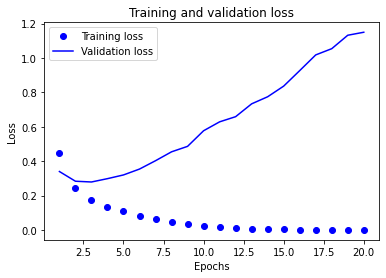

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" 训练损失绘制成蓝色原点
plt.plot(epochs, loss, 'bo', label='Training loss')
# "b" 验证损失绘制成蓝色线
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

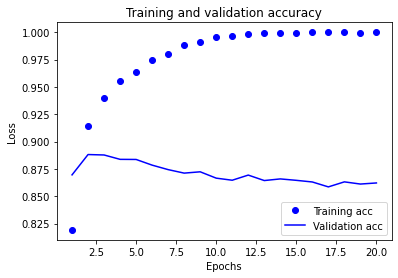

In [23]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

> The dots are the training loss and accuracy, while the solid lines are the validation
loss and accuracy. Note that your own results may vary slightly due to a different random
initialization of your network.

蓝色的点是训练损失和准确率，而蓝色的实线是验证损失和准确率。注意你自己运行的结果可能会由于网络随机初始化而产生一定差别。

> As you can see, the training loss decreases with every epoch and the training accuracy
increases with every epoch. That’s what you would expect when running gradient
descent optimization—the quantity you are trying to minimize should get lower with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. This is an example of what we were warning against earlier: a
model that performs better on the training data isn’t necessarily a model that will do
better on data it has never seen before. In precise terms, what you are seeing is
"overfitting": after the second epoch, we are over-optimizing on the training data, and we
ended up learning representations that are specific to the training data and do not
generalize to data outside of the training set.

正如你在上面的图形可以看到，训练损失在每个epoch过后都会下降且训练准确率在每个epoch过后都会上升。这是当你运行梯度下降优化时可以预期的 - 你试图最小化的值在每次迭代后都会更低。但是对于验证损失和准确率来说这就不一样了：它们看起来在第四次epoch之后达到了极值。这个例子印证了我们之前警告过的内容：一个在训练数据上运行良好的模型并不代表它能在未知数据上很好工作。用更精确的术语来描述的话，你这里看到的是“过拟合”：第二次epoch之后，我们过度优化了训练数据，我们最终学习到了训练数据上特定的表现形式，而且无法泛化到训练集之外的数据上。

> In this case, to prevent overfitting, we could simply stop training after three epochs.
In general, there is a range of techniques you can leverage to mitigate overfitting, which
we will cover in the next chapter.

在这个例子中，我们可以简单在在三次epochs之后停止训练来防止过拟合。更通常的情况下，我们有许多的技术来减少过拟合的发生，它们将在下一章中介绍。

> Let’s train a new network from scratch for four epochs, then evaluate it on our test
data:

让我们重新训练这个模型，只进行4个epochs，然后在我们的测试集上去评估模型的性能：

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 1s 53us/sample - loss: 0.4426 - accuracy: 0.8214
Epoch 2/4
25000/25000 [==============================] - 2s 66us/sample - loss: 0.2555 - accuracy: 0.9101
Epoch 3/4
25000/25000 [==============================] - 1s 51us/sample - loss: 0.1979 - accuracy: 0.9304
Epoch 4/4
25000/25000 [==============================] - 2s 73us/sample - loss: 0.3030 - accuracy: 0.8804


> Our fairly naive approach achieves an accuracy of 88%. With state-of-the-art
approaches, one should be able to get close to 95%.

我们这个很原始的方案取得了88%的准确率。使用一系列的改进，这个准确率可以接近95%。

### 3.4.5 使用训练好的网络生成新数据的预测

> After having trained a network, you will want to use it in a practical setting. You can
generate the likelihood of reviews being positive by using the predict method:

有了训练好的网络之后，你会想将它使用在实际环境中。你可以调用predict方法来生成评论是积极的似然值：

In [25]:
model.predict(x_test)

array([[0.21216378],
       [0.9984786 ],
       [0.9738066 ],
       ...,
       [0.21477203],
       [0.07282293],
       [0.8112107 ]], dtype=float32)

> As you can see, the network is very confident for some samples (0.99 or more, or
0.01 or less) but less confident for others (0.6, 0.4).

你可以看到，网络在某些样本上很确定（0.99或更高，或者0.01或更低），但是在其他一些样本上就不太确定（0.6，0.4）。

### 3.4.6 更多实验

> - We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects
validation and test accuracy.
- Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
- Try to use the mse loss function instead of binary_crossentropy .
- Try to use the tanh activation (an activation that was popular in the early days of neural
networks) instead of relu .

- 我们使用了2个隐藏层。尝试使用1个或3个隐藏层，看看对验证和测试准确率有什么影响。
- 尝试在层上使用更多的隐藏单元或更少的隐藏单元：32个，64个等等。
- 尝试使用`mse`损失函数而不是`binary_crossentropy`。
- 尝试使用`tanh`激活函数（这是一个神经网络早起很流行的激活函数）而不是`relu`。

> These experiments will help convince you that the architecture choices we have made are
all fairly reasonable, although they can still be improved!

这些实验会令你确信我们前面结构的选择已经是很合理的，虽然它还可以有改进的地方！

### 3.4.7 总结

> Here’s what you should take away from this example:

> - There’s usually quite a bit of preprocessing you need to do on your raw data in order to
be able to feed it—as tensors—into a neural network. In the case of sequences of words,
they can be encoded as binary vectors—but there are other encoding options too.
- Stacks of Dense layers with relu activations can solve a wide range of problems
(including sentiment classification), and you will likely use them frequently.
- In a binary classification problem (two output classes), your network should end with a
Dense layer with 1 unit and a sigmoid activation, i.e. the output of your network should
be a scalar between 0 and 1, encoding a probability.
- With such a scalar sigmoid output, on a binary classification problem, the loss function
you should use is binary_crossentropy .
- The rmsprop optimizer is generally a good enough choice of optimizer, whatever your
problem. That’s one less thing for you to worry about.
- As they get better on their training data, neural networks eventually start overfitting and
end up obtaining increasingly worse results on data never-seen-before. Make sure to
always monitor performance on data that is outside of the training set.

这个例子中你应该学习到下面的这些点：

- 你可能需要在原始数据上进行很多的预处理，才能使得这些数据能够以张量的形式输入到神经网络当中。在单词序列的场景中，它们被编码成二元矢量 - 不过也有其他的编码选择。
- 使用relu激活的全连接层的堆叠可以解决很广泛的问题（包括情绪分类），你可能会经常使用它们。
- 在一个二元分类问题中（两个输出类别），你的网络最后一层会是只有一个单元和sigmoid激活的全连接层，也就是网络的输出应该是一个0到1之间的标量，代表着概率。
- 在一个二元分类问题中使用了这样的标量sigmoid输出，你应该使用`binary_crossentropy`作为损失函数。
- `rmsprop`优化器通常来说都是一个好的选择，无论是怎样的问题。这是你需要关心最少的方面。
- 当模型在训练数据上获得越来越好的结果时，神经网络最终会开始过拟合，并且在未知数据上会获得越来越差的结果。确保你一直监视着模型在训练集之外的数据上的性能。

## 3.5 多类别分类器例子：分类新闻专线

> In the previous section we saw how to classify vector inputs into two mutually exclusive
classes using a densely-connected neural network. But what happens when you have
more than two classes?

在上一节中我们看到如何使用全连接神经网络将矢量输入分到两个互斥的类别当中。但当有着多于两个类的时候会怎么样？

> In this section, we will build a network to classify Reuters newswires into 46 different
mutually-exclusive topics. Since we have many classes, this problem is an instance of
"multi-class classification", and since each data point should be classified into only one
category, the problem is more specifically an instance of "single-label, multi-class
classification". If each data point could have belonged to multiple categories (in our case,
topics) then we would be facing a "multi-label, multi-class classification" problem.

在本节中，我们会构建一个网络来将路透社新闻专线分成46个不同的主题中。因为有多个类别，这个问题就是一个“多类别分类”的例子，而且因为每个数据点都应该被分到唯一的类别中，这个问题应该更明确的说是“单标签，多类别分类”。如果每个数据点能够从属于多个类别（在我们的例子中就是主题）那么我们面对的就是“多标签，多类别分类”问题

### 3.5.1 路透社数据集

> We will be working with the Reuters dataset , a set of short newswires and their topics,
published by Reuters in 1986. It’s a very simple, widely used toy dataset for text
classification. There are 46 different topics; some topics are more represented than
others, but each topic has at least 10 examples in the training set.

我们将要使用路透社数据集来完成这个例子，这是一个由短通讯和它们的主题构成的数据集，由路透社在1986年发表。这是一个在文本分类当中广泛使用的简单数据集。它有46个不同主题；有些主题比其他的要丰富一些，但是训练集的每个主题中至少有10个样本。

> Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. Let’s
take a look right away:

如同IMDB和MNIST，路透社数据集也被內建在Keras中。我们下面来看一下：

In [26]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

> Like with the IMDB dataset, the argument num_words=10000 restricts the data to the
10,000 most frequently occurring words found in the data.

> We have 8,982 training examples and 2,246 test examples:

就像IMDB数据集，参数`num_words=10000`将数据限制在数据中前10000个出现频率最高的单词内。

我们有了8982个训练样本和2246个测试样本：

In [27]:
train_data.shape

(8982,)

In [28]:
test_data.shape

(2246,)

> As with the IMDB reviews, each example is a list of integers (word indices):

每个样本是一个整数列表（单词序号列表），与IMDB评论一样：

In [29]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

> Here’s how you can decode it back to words, in case you are curious:

下面是将列表解码回单词的方法，如果你感兴趣的话：

In [30]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

> The label associated with an example is an integer between 0 and 45: a topic index.

一个样本对应的标签是一个介于0到45的整数：对应着主题的序号。

In [31]:
train_labels[0]

3

### 3.5.2 数据准备

> We can vectorize the data with the exact same code as in our previous example:

我们可以使用与上例中完全一样的代码对数据进行矢量化：

In [32]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

> To vectorize the labels, there are two possibilities: we could just cast the label list as
an integer tensor, or we could use a "one-hot" encoding. One-hot encoding is a widely
used format for categorical data, also called "categorical encoding". For a more detailed
explanation of one-hot encoding, you can refer to Chapter 6, Section 1. In our case,
one-hot encoding of our labels consists in embedding each label as an all-zero vector
with a 1 in the place of the label index, e.g.:

要将标签矢量化，有两种做法：我们可以简单的将变迁列表转换为整数张量，或者我们可以使用“one-hot”编码。One-hot编码在分类数据中是广泛使用的，因此也被称为“分类编码”。你可以参考第六章第1节的内容，学习有关one-hot编码更详细的说明。在我们的例子中，标签的one-hot编码是一个全零的矢量，除了标签所在位置为1之外，例如：

In [33]:
def to_one_hot(labels, dimensions=46):
    result = np.zeros((len(labels), dimensions))
    for i, label in enumerate(labels):
        result[i, label] = 1
    return result

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

> Note that there is a built-in way to do this in Keras, which you have already seen in
action in our MNIST example:

注意在Keras中有內建的函数能够完成这项任务，你已经在MNIST例子中见过它了：

In [34]:
from tensorflow.keras import utils

one_hot_train_labels = utils.to_categorical(train_labels)
one_hot_test_labels = utils.to_categorical(test_labels)

### 3.5.3 构建网络

> This topic classification problem looks very similar to our previous movie review
classification problem: in both cases, we are trying to classify short snippets of text.
There is however a new constraint here: the number of output classes has gone from 2 to
46, i.e. the dimensionality of the output space is much larger.

这个主题分类问题看起来非常像前面的那个影评分类问题：两种情况中，我们都试图对简短的文本片段进行分类。但是这个问题中我们遇到了一个新的约束：输出类别的数量从2增加到了46，也就是说这个问题的输出空间在维度上远超上一个例子。

> In a stack of Dense layers like what we were using, each layer can only access
information present in the output of the previous layer. If one layer drops some
information relevant to the classification problem, this information can never be
recovered by later layers: each layer can potentially become an "information bottleneck".
In our previous example, we were using 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such
small layers may act as information bottlenecks, permanently dropping relevant
information.

在一个我们之前使用的简单的全连接层堆叠的网络中，每个层次都仅能获取到上一个层次输出给它的信息。如果某个层次丢失了与分类问题相关信息的话，这些信息将永远无法被后续的层次复原：每个层都可能是潜在的“信息瓶颈”。在前面的例子中，我们使用了16维的中间层，但是一个16维的空间对于学习46个不同的分类问题来说可能存在着较大的限制：类似这种假设空间较小的层次可能就是信息的瓶颈，导致相关信息的永久丢失。

> For this reason we will use larger layers. Let’s go with 64 units:

因此我们将使用较大的层次，让我们选择使用64单元试试：

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

> There are two other things you should note about this architecture:

> - We are ending the network with a Dense layer of size 46. This means that for each input
sample, our network will output a 46-dimensional vector. Each entry in this vector (each
dimension) will encode a different output class.
- The last layer uses a softmax activation. You have already seen this pattern in the
MNIST example. It means that the network will output a probability distribution over the
46 different output classes, i.e. for every input sample, the network will produce a
46-dimensional output vector where output[i] is the probability that the sample
belongs to class i . The 46 scores will sum to 1.

关于这个结构还有两个需要注意的点：

- 网络中的最后一层是一个有着46单元的全连接层。这意味着对于每个输入样本，我们的网络会输出一个46维的向量。向量中的每个值（每个维度）实际上代表这不同的输出类别。
- 最后一层使用了`softmax`激活函数。你在之前的MNIST例子中已经见过。它表示网络将会输出在46个不同输出类别上的概率值，也就是说，对于每个输入样本，网络会产生一个46维的输出向量，其中的`output[i]`表示这个样本从属于类别i的概率。全部46个概率值加起来为1.

> The best loss function to use in this case is categorical_crossentropy . It
measures the distance between two probability distributions: in our case, between the
probability distribution output by our network, and the true distribution of the labels. By
minimizing the distance between these two distributions, we train our network to output
something as close as possible to the true labels.

在这个场景中最好的损失函数是`categorical_crossentropy`。它衡量着两个概率分布之间的距离：在我们的例子中就是我们网络输出的概率分布与真实标签概率分布之间的距离。通过尽可能减少这两个分布之间的距离，我们将网络训练成能够输出尽可能符合真实标签的模型。

In [36]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 3.5.4 验证我们的训练方法

> Let’s set apart 1,000 samples in our training data to use as a validation set:

下面我们将1000个样本从训练数据中抽取出来作为验证集：

In [37]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

> Now let’s train our network for 20 epochs:

下面我们使用20次迭代来训练我们的网络：

In [38]:
history = model.fit(partial_x_train, partial_y_train, batch_size=512,
                  epochs=20, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 117us/sample - loss: 2.7977 - accuracy: 0.4952 - val_loss: 1.8716 - val_accuracy: 0.5830
Epoch 2/20
7982/7982 [==============================] - 1s 108us/sample - loss: 1.5101 - accuracy: 0.6765 - val_loss: 1.3657 - val_accuracy: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 106us/sample - loss: 1.1032 - accuracy: 0.7652 - val_loss: 1.1842 - val_accuracy: 0.7430
Epoch 4/20
7982/7982 [==============================] - 0s 56us/sample - loss: 0.8633 - accuracy: 0.8176 - val_loss: 1.0802 - val_accuracy: 0.7790
Epoch 5/20
7982/7982 [==============================] - 0s 45us/sample - loss: 0.6884 - accuracy: 0.8571 - val_loss: 1.0186 - val_accuracy: 0.7840
Epoch 6/20
7982/7982 [==============================] - 0s 42us/sample - loss: 0.5531 - accuracy: 0.8826 - val_loss: 0.9498 - val_accuracy: 0.8120
Epoch 7/20
7982/7982 [==============================] - 1s 110us/sa

> Let’s display its loss and accuracy curves:

然后我们将损失和准确率曲线可视化：

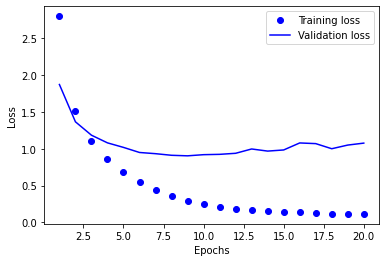

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

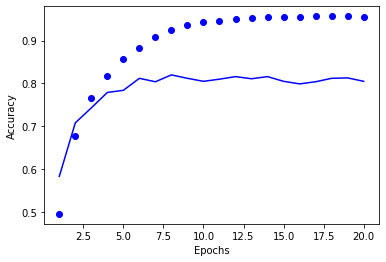

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend

> It seems that the network starts overfitting after 9 epochs. Let’s train a new network
from scratch for 9 epochs, then let’s evaluate it on the test set:

上面看出似乎网络在第9次迭代之后开始出现过拟合。因此下面我们可以重新训练一个网络，仅使用9次迭代，然后在测试集上来验证性能：

In [41]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=9,
                    batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 109us/sample - loss: 2.5417 - accuracy: 0.5326 - val_loss: 1.6613 - val_accuracy: 0.6550
Epoch 2/9
7982/7982 [==============================] - 0s 47us/sample - loss: 1.3697 - accuracy: 0.7176 - val_loss: 1.2834 - val_accuracy: 0.7170
Epoch 3/9
7982/7982 [==============================] - 1s 89us/sample - loss: 1.0266 - accuracy: 0.7793 - val_loss: 1.1689 - val_accuracy: 0.7460
Epoch 4/9
7982/7982 [==============================] - 0s 45us/sample - loss: 0.8160 - accuracy: 0.8279 - val_loss: 1.0345 - val_accuracy: 0.7780
Epoch 5/9
7982/7982 [==============================] - 0s 46us/sample - loss: 0.6544 - accuracy: 0.8623 - val_loss: 0.9832 - val_accuracy: 0.7920
Epoch 6/9
7982/7982 [==============================] - 0s 43us/sample - loss: 0.5297 - accuracy: 0.8919 - val_loss: 1.0068 - val_accuracy: 0.7740
Epoch 7/9
7982/7982 [==============================] - 0s 42us/sample - los

In [42]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 65us/sample - loss: 0.9941 - accuracy: 0.7805


[0.9940675952449401, 0.7804987]

> Our approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%, but in our
case it is closer to 19%, so our results seem pretty good, at least when compared to a
random baseline:

可以看到我们的网络可以达到接近80%的准确率。在一个平均分布的二分分类问题中，如果使用一个纯随机的分类器准确率应该是50%，但在这个场景中，这个几率大约是19%，因此我们的结果看起来很不错，起码在与随机的基线比较的情况下：

In [43]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels_copy) == np.array(test_labels))) / len(test_labels)

0.18432769367764915

### 3.5.5 在新数据上生成预测值

> We can verify that the predict method of our model instance returns a probability
distribution over all 46 topics. Let’s generate topic predictions for all of the test data:

我们可以验证一下模型的预测输出，是一个46个主题上的概率分布。我们可以使用`predict`产生所有测试数据上的预测值：

In [44]:
predictions = model.predict(x_test)

> Each entry in predictions is a vector of length 46:

`predictions`中的每个预测值都是一个长度为46的向量：

In [45]:
predictions.shape

(2246, 46)

> The coefficients in this vector sum to 1:

这个向量中所有的因子之和为1：

In [46]:
predictions[0].sum()

0.99999994

### 3.5.6 处理标签和损失的另一种方法

> We mentioned earlier that another way to encode the labels would be to cast them as an
integer tensor, like such:

前面提到过我们还有另一种方法来对标签进行编码，将它转换成一个整数张量，就像下面这样；

In [47]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

> The only thing it would change is the choice of the loss function. Our previous loss,
categorical_crossentropy , expects the labels to follow a categorical encoding. With
integer labels, we should use sparse_categorical_crossentropy :

这里需要改变的是损失函数。我们之前使用`categorical_crossentropy`，期望这些标签遵循明确分类的编码。但在整数标签中，我们应该使用`sparse_categorical_crossentropy`损失函数：

In [48]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

> This new loss function is still mathematically
categorical_crossentropy ; it just has a different interface.

这个新的损失函数在数学上仍然等同于`categorical_crossentropy`；它只是另外一种接口形式而已。

### 4.5.7 足够大假设空间中间层的重要性

> We mentioned earlier that since our final outputs were 46-dimensional, we should avoid
intermediate layers with much less than 46 hidden units. Now let’s try to see what
happens when we introduce an information bottleneck by having intermediate layers
significantly less than 46-dimensional, e.g. 4-dimensional.

前面我们提到因为最终的输出是46维的，需要避免模型有着远少于46个隐藏单元的中间层。下面我们试着看一下如果在网络中定义一个少于46维（例如4维）的中间层，产生信息瓶颈的情况。

In [49]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, batch_size=128,
          epochs=20, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 124us/sample - loss: 2.5492 - accuracy: 0.5190 - val_loss: 1.8208 - val_accuracy: 0.6230
Epoch 2/20
7982/7982 [==============================] - 1s 68us/sample - loss: 1.5487 - accuracy: 0.6473 - val_loss: 1.4841 - val_accuracy: 0.6480
Epoch 3/20
7982/7982 [==============================] - 1s 65us/sample - loss: 1.2746 - accuracy: 0.6825 - val_loss: 1.3780 - val_accuracy: 0.6730
Epoch 4/20
7982/7982 [==============================] - 1s 105us/sample - loss: 1.1194 - accuracy: 0.7228 - val_loss: 1.3334 - val_accuracy: 0.6900
Epoch 5/20
7982/7982 [==============================] - 1s 65us/sample - loss: 1.0080 - accuracy: 0.7434 - val_loss: 1.3202 - val_accuracy: 0.6910
Epoch 6/20
7982/7982 [==============================] - 1s 63us/sample - loss: 0.9225 - accuracy: 0.7607 - val_loss: 1.3206 - val_accuracy: 0.6950
Epoch 7/20
7982/7982 [==============================] - 1s 66us/samp

> Our network now seems to peak at ~71% validation accuracy, a 8% absolute drop.
This drop is mostly due to the fact that we are now trying to compress a lot of
information (enough information to recover the separation hyperplanes of 46 classes) into
an intermediate space that is too low-dimensional. The network is able to cram most of
the necessary information into these 8-dimensional representations, but not all of it.

网络在这种情况下达到的验证准确率的峰值大约是71%，比前面那个网络下降了8%。造成这个结果的原因主要是我们试图将很多信息（能在超平面中将46个分类分开的足够信息）压缩到一个很低维度的中间空间当中。这个网络能够将大部分需要的信息塞进这些8维表示中，但不是全部需要的信息都能塞进去。

### 3.5.8 更多实验

> - Try using larger or smaller layers: 32 units, 128 units...
- We were using two hidden layers. Now try to use a single hidden layer, or three hidden
layers.

- 尝试使用更大或更小的层：32隐藏单元，128隐藏单元...
- 上面使用了2个隐藏层。尝试使用单个隐藏层，或者3个隐藏层。

### 3.5.9 总结

> Here’s what you should take away from this example:

> - If you are trying to classify data points between N classes, your network should end with
a Dense layer of size N.
- In a single-label, multi-class classification problem, your network should end with a
softmax activation, so that it will output a probability distribution over the N output
classes.
- Categorical crossentropy is almost always the loss function you should use for such
problems. It minimizes the distance between the probability distributions output by the
network, and the true distribution of the targets.
- There are two ways to handle labels in multi-class classification:
    - Encoding the labels via "categorical encoding" (also known as "one-hot encoding") and
using categorical_crossentropy as your loss function.
    - Encoding the labels as integers and using the sparse_categorical_crossentropy lo
function.
- If you need to classify data into a large number of categories, then you should avoid
creating information bottlenecks in your network by having intermediate layers that are
too small.

下面列出这个例子中你应该打包带走的内容：

- 如果你尝试将数据点分为N个类别，你的网络最后一层应该是具有N尺寸的全连接层。
- 在一个单一标记、多类别分类问题中，你的网络最后应该使用`softmax`激活函数，使得它能够输出在N个输出类别上的概率分布。
- 多类别交叉熵通常都是这类问题最合适的损失函数。它能尽可能减少网络输出的概率分布与真实目标概率分布之间的距离。
- 在多类别分类中有两种方式处理标签：
    - 将标签编码成`categorical编码`（也被称为`one-hot编码`），然后使用`categorical_crossentropy`作为损失函数。
    - 将标签编码成整数张量，然后使用`sparse_categorical_crossentropy`作为损失函数。
- 如果你需要将数据分成很多类别，你应该避免使用了过小的中间层从而造成信息瓶颈。

### 3.6 回归的例子：预测房价

> In our two previous examples, we were considering classification problems, where the
goal was to predict a single discrete label of an input data point. Another common type of
machine learning problem is "regression", which consists of predicting a continuous
value instead instead of a discrete label. For instance, predicting the temperature
tomorrow, given meteorological data, or predicting the time that a software project will
take to complete, given its specifications.

在前面两个例子当中，我们都在应用分类问题，它们的目标都是在输入数据点上预测一个离散标签。除此之外还有另一种常见的机器学习问题，叫做“回归”，它预测的是一个连续的值而不是一个离散的标签。例如给定气象数据来预测明天的温度，或者根据软件的规格说明来预测软件工程的完成时间。

> Do not mix up "regression" with the algorithm "logistic regression": confusingly,
"logistic regression" is not a regression algorithm, it is a classification algorithm.

不要将这里的“回归”问题与“逻辑回归”算法混淆起来：这里很容易令人困惑，但实际上“逻辑回归”不是一个回归算法，而是一个分类算法。

### 3.6.1 波斯顿房价数据集

> We will be attempting to predict the median price of homes in a given Boston suburb in
the mid-1970s, given a few data points about the suburb at the time, such as the crime
rate, the local property tax rate, etc.

我们尝试预测波斯顿近郊在1970年代中期的平均房价，使用一些给定当时的数据点，比如犯罪率、当地房产税率等。

> The dataset we will be using has another interesting difference from our two previous
examples: it has very few data points, only 506 in total, split between 404 training
samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a
feature) has a different scale. For instance some values are proportions, which take a
values between 0 and 1, others take values between 1 and 12, others between 0 and
100...

我们将要使用的数据和前面两个例子中的数据集有另外一个有趣的区别：它的数据点很少，一共只有506个，分为404个训练样本和102个测试样本，而且数据中的每个“特征”（例如犯罪率就是一个特征）有着不同的范围。如一些值是比例，它们的值处于0和1之间，另外的一些取值范围是1和12之间，还有一些范围是0和100之间等。

> Let’s take a look at the data:

我们先来看一下数据：

In [50]:
(train_data, train_targets), (test_data, test_targets) = datasets.boston_housing.load_data()
train_data.shape

(404, 13)

In [51]:
test_data.shape

(102, 13)

> As you can see, we have 404 training samples and 102 test samples. The data
comprises 13 features. The 13 features in the input data are as follow:

> 1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

你可以看到，这里有404个训练样本和102个测试样本。数据中包含着13个特征。输入数据中的13特征分别是：

1. 人均犯罪率。
2. 25000平方英尺上住宅用地比例。
3. 每个城镇中非零售工业的比例。
4. 查尔斯河二元变量（河边为1，否则为0）。
5. 一氧化氮浓度（每千万含量）。
6. 每个住宅的平均房间数量。
7. 在1940年之前自建住宅的比例。
8. 到5个波斯顿就业中心区域的加权距离。
9. 到达主要高速公路的排序编号。
10. 每万美元的全额房产税率。
11. 城镇的学生教师比。
12. $1000 \times (Bk - 0.63)^2$，其中的Bk是城镇中黑人人口比例。
13. 低端人口百分比。

> The targets are the median values of owner-occupied homes, in thousands of dollars:

目标是自建住宅的平均价格，单位是千美元：

In [52]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

> The prices are typically between `$10,000` and `$50,000`. If that sounds cheap,
remember this was the mid-1970s, and these prices are not inflation-adjusted.

以上价格基本上都介于一万美元到五万美元之间。如果你觉得很便宜，请记住这是1970年代中期，这些价格没有基于通货膨胀进行调整。

### 3.6.2 数据准备

> It would be problematic to feed into a neural network values that all take wildly different
ranges. The network might be able to automatically adapt to such heterogeneous data, but
it would definitely make learning more difficult. A widespread best practice to deal with
such data is to do feature-wise normalization: for each feature in the input data (a column
in the input data matrix), we will subtract the mean of the feature and divide by the
standard deviation, so that the feature will be centered around 0 and will have a unit
standard deviation. This is easily done in Numpy:

如果我们将上面这些极端不同范围的数据直接输入到神经网络的话，会有问题。网络可能可以自动适应这种极度异质的数据，但是这肯定会导致学习过程更为困难。处理这种数据有一种广泛使用的最佳实践，对逐个特征进行标准化：对于输入数据中的每个特征（即输入数据矩阵中的一列），我们将它减去该特征的均值然后除以标准差，这样处理过后，这个特征会集中在0点附近并且具有单位标准差。在Numpy中很容易完成：

In [53]:
# train_data = (train_data - train_data.mean(axis=0)) / train_data.std(axis=)
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# test_data = (test_data - mean) / std
test_data -= mean
test_data /= std

> Note that the quantities that we use for normalizing the test data have been computed
using the training data. We should never use in our workflow any quantity computed on
the test data, even for something as simple as data normalization.

必须注意的是我们用来标准化测试数据时使用的仍然是在训练数据上计算得到的均值和标准差。永远不要在工作流中使用任何在测试数据上计算得到的量，即使只是面对诸如数据标准化这样的简单的任务时也是一样。

### 3.6.3 构建网络

> Because so few samples are available, we will be using a very small network with two
hidden layers, each with 64 units. In general, the less training data you have, the worse
overfitting will be, and using a small network is one way to mitigate overfitting.

因为可用的样本非常少，我们会使用一个只有两个隐藏层的很小的网络，每个有着64个单元。通常来说，训练数据越少，过拟合就会越严重，而使用小型网络是减轻过拟合的措施之一。

In [54]:
def build_model():
    '''
    build_model 构建模型工具函数
    因为我们需要多次实例化同一个模型，因此我们定义一个工具函数来简化代码
    '''
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

> Our network ends with a single unit, and no activation (i.e. it will be linear layer).
This is a typical setup for scalar regression (i.e. regression where we are trying to predict
a single continuous value). Applying an activation function would constrain the range
that the output can take; for instance if we applied a sigmoid activation function to our
last layer, the network could only learn to predict values between 0 and 1. Here, because
the last layer is purely linear, the network is free to learn to predict values in any range.

网络最后一层只有一个隐藏单元，并且没有激活函数（也就是说它是一个线性层）。这是标量回归（也就是回归的结果是单一的连续值）的标准设置。在这种情况下应用激活函数会限制输出值的范围；例如假设我们在最后一层应用了`sigmoid`激活函数的话，网络只能学会预测介于0和1之间的值。上面的网络中最后一层是纯线性的，因此可以学习到预测任何范围内的值。

> Note that we are compiling the network with the mse loss function—Mean Squared
Error, the square of the different between the predictions and the targets, a widely used
loss function for regression problems.

还需要注意我们使用`mse`损失函数 - 平均平方错误 - 来编译这个网络，它表示预测与目标之间的平方距离，这是回归问题中广泛使用的损失函数。

> We are also monitoring a new metric during training: mae . This stands for Mean
Absolute Error. It is simply the absolute value of the difference between the predictions
and the targets. For instance, a MAE of 0.5 on this problem would mean that our
predictions are off by $500 on average.

还有一个地方，上面我们在训练过程中使用了一个新的监视指标：`mae`，也就是平均绝对错误。这是预测和目标之间距离的绝对值。例如，在这个例子中，一个0.5的MAE值表示我们的预测和目标之间有500美元的平均差距。

### 3.6.4 使用K-折方法验证

> To evaluate our network while we keep adjusting its parameters (such as the number of
epochs used for training), we could simply split the data into a training set and a
validation set, as we were doing in our previous examples. However, because we have so
few data points, the validation set would end up being very small (e.g. about 100
examples). A consequence is that our validation scores may change a lot depending on
which data points we choose to use for validation and which we choose for training, i.e.
the validation scores may have a high variance with regard to the validation split. This
would prevent us from reliably evaluating our model.

为了在持续调整网络参数的过程中验证网络性能（比如在训练中使用多次epochs迭代的方法），我们可以将数据进一步分为训练集和验证集，正如我们在前面的例子做的那样。然而，本例中我们的数据点很少，验证集会非常非常小（比如大约100个样本）。这会造成训练时的验证分值会十分依赖我们用来训练和验证的数据点而频繁变化，也就是验证分值对于不同的验证集划分而有着非常高的方差。这会使得我们无法很可靠的验证模型性能。

> The best practice in such situations is to use K-fold cross-validation. It consists of
splitting the available data into K partitions (typically K=4 or 5), then instantiating K
identical models, and training each one on K-1 partitions while evaluating on the
remaining partition. The validation score for the model used would then be the average of
the K validation scores obtained.

这种情况下的最佳实践是使用K-折交叉验证。它包括将可用的数据分为K个分区（通常K=4或5），然后同时实例化K个相同的模型，在每个模型上使用不同的K-1个分区数据进行数据和剩下的那个分区数据进行验证。模型使用的验证分数将会是获得的K个分值的均值。

![3-folds](imgs/f3.11.jpg)

图3-11 3折交叉验证

> In terms of code, this is straightforward:

表达成代码也很直接：

In [55]:
import numpy as np
k = 4 # 4折交叉验证
num_val_samples = len(train_data) // k # 验证分区数据的样本数
num_epochs = 100 # 迭代次数
all_scores = [] # 存储所有验证分值的集合
for i in range(k):
    print('正在进行的折：', i)
    # 准备验证数据，使用第i个分区数据作为验证数据
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    # 准备训练数据，使用除了第i个分区数据外的其他数据作为训练数据
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    # 使用刚才的工具函数构建每一折的网络
    model = build_model()
    # 训练模型（verbose=0 表示静默模式，无输出）
    model.fit(partial_train_data, partial_train_targets,
                epochs=num_epochs, batch_size=1, verbose=0)
    # 在验证数据上验证模型性能
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

正在进行的折： 0
正在进行的折： 1
正在进行的折： 2
正在进行的折： 3


> Running the above snippet with num_epochs = 100 yields the following results:

在上面的代码执行100次迭代会得到下面的结果：

In [56]:
all_scores

[1.9331642, 2.6493096, 2.4610572, 2.3756325]

In [57]:
np.mean(all_scores)

2.354791

> As you can notice, the different runs do indeed show rather different validation
scores, from 2.6 to 3.2. Their average (3.0) is a much more reliable metric than any single
of these scores—that’s the entire point of K-fold cross-validation. In this case, we are off
by `$3,000` on average, which is still significant considering that the prices range from
`$10,000` to `$50,000`.

你注意到，每个折在执行都得到了有一定差异的验证分值，从2.6到3.2。它们的均值（3.0）是一个更为可靠的指标作为模型性能的衡量 - 这就是K-折交叉验证方法的全部内涵。在这个例子中，我们与实际目标差距是3000美元，这对于价格取值区域从10000美元到50000美元来说，仍然是一个较大的差异。

译者注：原文照译，如果按照译者自己跑出的结果，平均绝对错误的均值应为2.5左右，实际目标差距在2500美元左右。

> Let’s try training the network for a bit longer: 500 epochs. To keep a record of how
well the model did at each epoch, we will modify our training loop to save the per-epoch
validation score log:

让我们试试将网络训练更长的时间：500次迭代。为了记录每次迭代模型的表现，我们在训练循环中修改一下代码来保存每次迭代的验证分值日志：

In [58]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('正在进行的折：', i)
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

正在进行的折： 0
正在进行的折： 1
正在进行的折： 2
正在进行的折： 3


> We can then compute the average of the per-epoch MAE scores for all folds:

然后来计算所有折上每次epoch的MAE的均值：

In [59]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

把所有epochs上的平均绝对错误绘制出来：

Text(0, 0.5, 'Validation MAE')

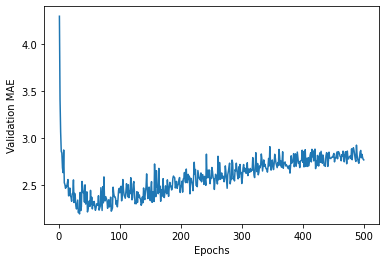

In [60]:
plt.plot(np.arange(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

> It may be a bit hard to see the plot due to scaling issues and relatively high variance.
Let’s:

> - Omit the first 10 data points, which are on a different scale from the rest of the curve.
- Replace each point with an exponential moving average of the previous points, to obtain
a smooth curve

这个图表很难看清楚，因为它的点很多而且相对来说方差也比较高。我们可以：

- 忽略前面10个数据点，因为它们和曲线的其他部位显然处在不同的取值区间当中。
- 将每个点替换成前一个数据点的指数移动平均数，来获得一条平滑的曲线。

Text(0, 0.5, 'Validation MAE')

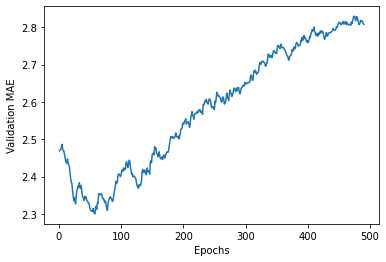

In [61]:
def smooth_curve(points, factor=0.9):
    '''
    smooth_curve 求移动平均曲线函数
    参数 points 原始曲线数据点
    参数 factor 前一数据点值对于目前数据点值影响的权重值
    返回 平滑曲线数据点
    '''
    smoothed_points = [] # 记录平滑曲线数据点的列表
    for point in points:
        # 如果存在前一个点
        if smoothed_points:
            previous = smoothed_points[-1]
            # 当前数据点的值设置为 previous * factor + point * (1 - factor)
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:]) # 去掉前10个数据点，平滑曲线

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

> According to this plot, it seems that validation MAE stops improving significantly
after after 80 epochs. Past that point, we start overfitting.

从上图可以看出，验证的平均绝对错误从80个epochs开始就停止改善了。过了这个点之后，我们开始过拟合。

> Once we are done tuning other parameters of our model (besides the number of
epochs, we could also adjust the size of the hidden layers), we can train a final
"production" model on all of the training data, with the best parameters, then look at its
performance on the test data:

当我们完成对我们其他参数的调整之后（除了迭代的次数外，我们还可以调整隐藏层的尺寸），我们就能使用它们在所有的训练数据上训练一个“生产”模型了，然后再看它在测试数据上的表现：

In [62]:
# 使用一个全新的模型
model = build_model()
# 在整个训练集上进行学习
model.fit(train_data, train_targets,
    epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 628us/sample - loss: 18.4982 - mae: 2.7464


In [63]:
test_mae_score

2.7464004

> We are still off by about `$2,550`.

我们的差距还有大约2550美元（译者注：本人计算机训练的模型差距为2750美元）。

### 3.6.5 总结

> Here’s what you should take away from this example:

> - Regression is done using different loss functions from classification; Mean Squared Error
(MSE) is a commonly used loss function for regression.
- Similarly, evaluation metrics to be used for regression differ from those used for
classification; naturally the concept of "accuracy" does not apply for regression. A
common regression metric is Mean Absolute Error (MAE).
- When features in the input data have values in different ranges, each feature should be
scaled independently as a preprocessing step.
- When there is little data available, using K-Fold validation is a great way to reliably
evaluate a model.
- When little training data is available, it is preferable to use a small network with very few
hidden layers (typically only one or two), in order to avoid severe overfitting.

下面列出了本节你需要打包带走的内容：

- 回归使用的是和分类不同的损失函数；平均平方错误（MSE）在回归问题中是经常使用的损失函数。
- 同样的，在回归中使用的评估指标也和分类不一样；“准确率”概念很自然的无法应用到回归问题之上。一个常用的回归指标是平均绝对错误（MAE）。
- 如果数据量很小，K-折验证是一个能可靠验证模型的方法。
- 如果训练数据很少，最好选择使用一个小型的网络，里面仅有少量的隐藏层（典型的只有1到2层），能够有效避免严重的过拟合。

> This example concludes our series of three introductory practical examples. You are
now able to handle common types of problems with vector data input:

> - Binary (2-class) classification.
- Multi-class, single-label classification.
- Scalar regression.

这个例子结束了我们本章三个介绍性的实际问题的系列讲解。你现在已经能够处理那些使用矢量数据作为输入的常见问题了：

- 二分分类。
- 多类别单标签分类
- 标量回归

> In the next chapter, you will acquire a more formal understanding of some of the
concepts you have encountered in these first examples, such as data preprocessing, model
evaluation, and overfitting.

在下一章中，你会对本章这些例子遇到的一些概念进行更加正式深入的理解，例如数据预处理、模型验证和过拟合。

<< [第二章：开始之前：神经网络的数学知识](Chapter2-Mathematical-blocks-of-neural-networks.ipynb) || [目录](index.md) || [第四章：机器学习基础](Chapter4-Fundamentals-of-machine-learning.ipynb) >>